# Insurance Claim Fraud Detection is a classification Model

In [1]:
print(('*'*127))
print("                                                      Insurance Claim Fraud Detection                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Insurance Claim Fraud Detection                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 40)


df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [3]:
df.shape

(1000, 40)

* Here we that there is 1000 Rows and 40 Columns for this Dataset

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

* Here we observe that majority of the Columns are of Object-type and our Target variable is fraud_reported

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

* Here we observe that _c39 columns is completely NaN so we remove it

In [6]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [7]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [8]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [9]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [10]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [11]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [12]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [13]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [14]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [15]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [16]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [17]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [18]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [19]:
df['auto_make'].value_counts()

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [20]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
E400              27
F150              27
95                27
Grand Cherokee    25
93                25
Tahoe             24
Escape            24
Maxima            24
X5                23
Ultima            23
Civic             22
Highlander        22
Silverado         22
Fusion            21
CRV               20
TL                20
ML350             20
Corolla           20
Impreza           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [21]:
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [22]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

# Data Cleaning

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()


df["fraud_reported"] = lb.fit_transform(df["fraud_reported"])

In [24]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

# Missing Value Treatment

In [25]:
df.drop(columns=['_c39'],axis=1,inplace=True)

# Checking VIF ( Variance Inflation Factor )

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 328   48         521585             532.0           2.0   
1                 228   42         342868             821.0           1.0   
2                 134   29         687698             186.0           2.0   
3                 256   41         227811             766.0           0.0   
4                 228   44         367455             181.0           0.0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0         1.0               1000                1406.91               0   
1         1.0               2000                1197.22         5000000   
2         0.0               2000                1413.14         5000000   
3         1.0               2000                1415.74         6000000   
4         2.0               1000                1583.91         6000000   

   insured_zip  insured_sex  insured_education_level  insured_occupation  \
0       466132          1.0                      4.0                 2.0   
1       468176          1.0                      4.0                 6.0   
2       430632          0.0                      6.0                11.0   
3       608117          0.0                      6.0                 1.0   
4       610706          1.0                      0.0                11.0   

   insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0             17.0                   0.0          53300             0   
1             15.0                   2.0              0             0   
2              2.0                   3.0          35100             0   
3              2.0                   4.0          48900        -62400   
4              2.0                   4.0          66000        -46000   

   incident_date  incident_type  collision_type  incident_severity  \
0           49.0            2.0             3.0                0.0   
1           41.0            3.0             0.0                1.0   
2           44.0            0.0             2.0                1.0   
3           19.0            2.0             1.0                0.0   
4           34.0            3.0             0.0                1.0   

   authorities_contacted  incident_state  incident_city  incident_location  \
0                    4.0             4.0            1.0              996.0   
1                    4.0             5.0            5.0              628.0   
2                    4.0             1.0            1.0              685.0   
3                    4.0             2.0            0.0              669.0   
4                    2.0             1.0            0.0              220.0   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1              2.0   
1                         8                            1              0.0   
2                         7                            3              1.0   
3                         5                            1              0.0   
4                        20                            1              1.0   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                      2.0               71610   
1                0          0                      0.0                5070   
2                2          3                      1.0               34650   
3                1          2                      1.0               63400   
4                0          1                      1.0                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080       10.0         1.0   
1           780             780           3510        8.0        12.0   
2          7700            3850          23100        4.0        30.0   
3          6340            6340          50720        3.0        34.0   
4     

In [27]:
calculate_vif(F)

F   VIF_Value
0            months_as_customer   28.320936
1                           age  131.410308
2                 policy_number    5.695648
3              policy_bind_date    4.080172
4                  policy_state    2.586475
5                    policy_csl    2.468502
6             policy_deductable    4.616823
7         policy_annual_premium   28.604827
8                umbrella_limit    1.267672
9                   insured_zip   51.482666
10                  insured_sex    1.912969
11      insured_education_level    3.451642
12           insured_occupation    3.819122
13              insured_hobbies    4.146659
14         insured_relationship    3.222104
15                capital-gains    1.878336
16                 capital-loss    1.983389
17                incident_date    4.039176
18                incident_type   11.088509
19               collision_type    5.938155
20            incident_severity    3.133113
21        authorities_contacted    3.223194
22               incident_state    3.413614
23                incident_city    3.189108
24            incident_location    4.150301
25     incident_hour_of_the_day    4.211545
26  number_of_vehicles_involved   21.810510
27              property_damage    2.434785
28              bodily_injuries    2.525060
29                    witnesses    2.912071
30      police_report_available    2.511322
31           total_claim_amount         inf
32                 injury_claim         inf
33               property_claim         inf
34                vehicle_claim         inf
35                    auto_make    3.896718
36                   auto_model    4.289119
37                    auto_year  213.288588

* Here we observe that auto_year only has a very High correlation and we remove it

In [28]:
df.drop(columns=['auto_year'],axis=1,inplace=True)

In [29]:
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585             532.0           2.0   
1                   228   42         342868             821.0           1.0   
2                   134   29         687698             186.0           2.0   
3                   256   41         227811             766.0           0.0   
4                   228   44         367455             181.0           0.0   
5                   256   39         104594             385.0           2.0   
6                   137   34         413978             112.0           1.0   
7                   165   37         429027              60.0           0.0   
8                    27   33         485665             132.0           0.0   
9                   212   42         636550             772.0           0.0   
10                  235   42         543610             795.0           2.0   
11                  447   61         214618             891.0           2.0   
12                   60   23         842643             634.0           2.0   
13                  121   34         626808             806.0           2.0   
14                  180   38         644081             875.0           2.0   
15                  473   58         892874             601.0           1.0   
16                   70   26         558938             251.0           2.0   
17                  140   31         275265             470.0           1.0   
18                  160   37         921202             879.0           2.0   
19                  196   39         143972              44.0           1.0   
20                  460   62         183430             769.0           1.0   
21                  217   41         431876             834.0           0.0   
22                  370   55         285496             816.0           0.0   
23                  413   55         115399             237.0           1.0   
24                  237   40         736882              33.0           1.0   
25                    8   35         699044             163.0           2.0   
26                  257   43         863236             629.0           1.0   
27                  202   34         608513             559.0           1.0   
28                  224   40         914088             236.0           2.0   
29                  241   45         596785             106.0           0.0   
30                   64   25         908616             544.0           0.0   
31                  166   37         666333             591.0           0.0   
32                  155   35         336614              20.0           0.0   
33                  114   30         584859             107.0           0.0   
34                  149   37         990493             391.0           0.0   
35                  147   33         129872             256.0           2.0   
36                   62   28         200152             268.0           0.0   
37                  289   49         933293              61.0           0.0   
38                  431   54         485664             781.0           1.0   
39                  199   37         982871             823.0           1.0   
40                   79   26         206213             246.0           0.0   
41                  116   34         616337             931.0           1.0   
42                   37   23         448961             920.0           0.0   
43                  106   30         790442             397.0           2.0   
44                  269   44         108844             161.0           0.0   
45                  265   40         430029             663.0           0.0   
46                  163   33         529112             233.0           1.0   
47                  355   47         939631             547.0           2.0   
48                  175   34         866931             199.0           1.0   
49                  192   35         582011            

# Outlier Check and Removal

In [30]:
df1 = df[['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip']]

In [31]:
df4 = df[['bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'fraud_reported']]

In [32]:
df3 = df[['incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage']]

In [33]:
df2 = df[['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date']]

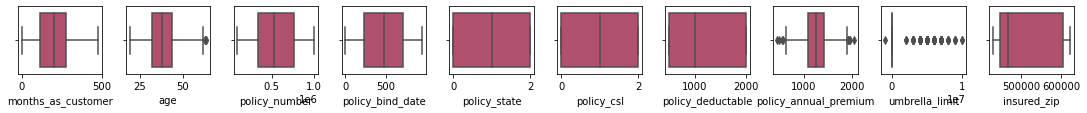

In [34]:
Columns = df1.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[30,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='flare_r')
    plt.tight_layout()

In [35]:
Columns = df2.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[30,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df2[Columns[i]], color='green', orient='H', palette='flare_r')
    plt.tight_layout()

In [36]:
Columns = df3.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[38,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df3[Columns[i]], color='green', orient='H', palette='flare_r')
    plt.tight_layout()

In [37]:
Columns = df4.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[30,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df4[Columns[i]], color='green', orient='H', palette='flare_r')
    plt.tight_layout()

In [38]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(1000, 38)

In [39]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [40]:
new_df.shape

(980, 38)

# DataLoss %

In [41]:
Loss = (1000/980)/1000*100

In [42]:
Loss

0.10204081632653061

* Here we observe a Datasloss of 0.10% after the Outlier check and removal

In [43]:
new_df['policy_state'].value_counts()

2.0    348
0.0    328
1.0    304
Name: policy_state, dtype: int64

In [44]:
new_df['insured_sex'].value_counts()

0.0    524
1.0    456
Name: insured_sex, dtype: int64

In [45]:
new_df['insured_education_level'].value_counts()

2.0    159
3.0    156
0.0    144
5.0    141
4.0    138
6.0    123
1.0    119
Name: insured_education_level, dtype: int64

In [46]:
new_df['insured_hobbies'].value_counts()

15.0    63
8.0     57
3.0     56
12.0    55
4.0     54
13.0    54
19.0    53
11.0    53
9.0     52
10.0    51
18.0    50
16.0    49
0.0     48
5.0     46
2.0     46
14.0    45
7.0     40
17.0    40
1.0     34
6.0     34
Name: insured_hobbies, dtype: int64

In [47]:
new_df['insured_relationship'].value_counts()

3.0    181
1.0    173
2.0    170
0.0    166
5.0    153
4.0    137
Name: insured_relationship, dtype: int64

In [48]:
new_df['incident_type'].value_counts()

0.0    408
2.0    398
3.0     92
1.0     82
Name: incident_type, dtype: int64

In [49]:
new_df['collision_type'].value_counts()

2.0    287
3.0    270
1.0    249
0.0    174
Name: collision_type, dtype: int64

In [50]:
new_df['incident_severity'].value_counts()

1.0    346
2.0    275
0.0    271
3.0     88
Name: incident_severity, dtype: int64

In [51]:
new_df['authorities_contacted'].value_counts()

4.0    287
1.0    221
0.0    192
3.0    191
2.0     89
Name: authorities_contacted, dtype: int64

In [52]:
new_df['incident_state'].value_counts()

1.0    257
4.0    241
6.0    213
5.0    109
0.0    108
3.0     30
2.0     22
Name: incident_state, dtype: int64

In [53]:
new_df['incident_city'].value_counts()

6.0    155
1.0    147
0.0    144
3.0    143
2.0    139
5.0    131
4.0    121
Name: incident_city, dtype: int64

In [54]:
new_df['property_damage'].value_counts()

0.0    352
1.0    330
2.0    298
Name: property_damage, dtype: int64

In [55]:
new_df['police_report_available'].value_counts()

1.0    338
0.0    333
2.0    309
Name: police_report_available, dtype: int64

In [56]:
new_df['auto_make'].value_counts()

10.0    80
11.0    80
4.0     78
9.0     77
3.0     76
12.0    70
5.0     70
2.0     69
1.0     68
0.0     65
13.0    65
8.0     64
7.0     64
6.0     54
Name: auto_make, dtype: int64

In [57]:
new_df['auto_model'].value_counts()

30.0    43
36.0    40
4.0     36
20.0    35
27.0    35
23.0    34
21.0    32
5.0     32
29.0    31
25.0    30
28.0    30
1.0     28
9.0     28
15.0    28
3.0     27
12.0    26
14.0    26
2.0     25
26.0    24
17.0    24
34.0    24
37.0    23
13.0    23
32.0    22
18.0    22
35.0    22
10.0    22
16.0    21
11.0    20
19.0    20
24.0    20
8.0     19
33.0    19
7.0     18
0.0     17
38.0    15
22.0    14
6.0     13
31.0    12
Name: auto_model, dtype: int64

In [58]:
new_df['fraud_reported'].value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

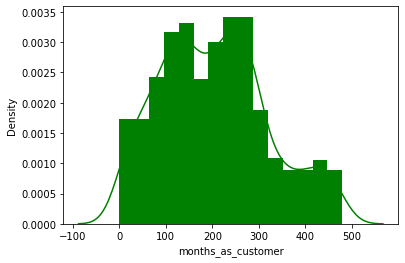

In [59]:
sn.distplot(new_df["months_as_customer"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

In [60]:
sn.distplot(new_df["age"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='age', ylabel='Density'>

* Here we observe a good distribution of data

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

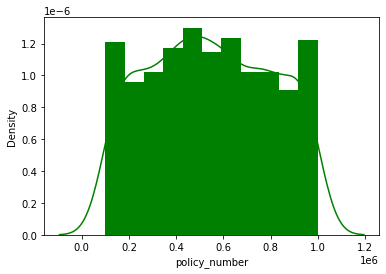

In [61]:
sn.distplot(new_df["policy_number"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

In [62]:
sn.distplot(new_df["policy_bind_date"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='policy_bind_date', ylabel='Density'>

* Here we observe a good distribution of data

In [63]:
sn.distplot(new_df["policy_state"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='policy_state', ylabel='Density'>

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='policy_csl', ylabel='Density'>

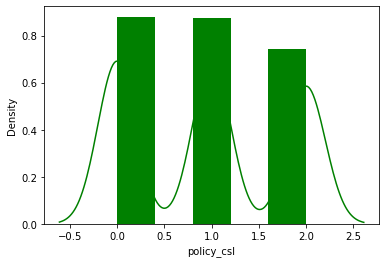

In [64]:
sn.distplot(new_df["policy_csl"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

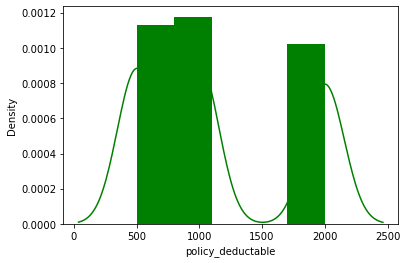

In [65]:
sn.distplot(new_df["policy_deductable"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

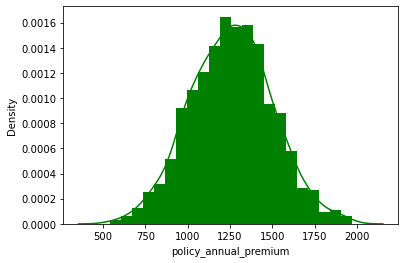

In [66]:
sn.distplot(new_df["policy_annual_premium"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

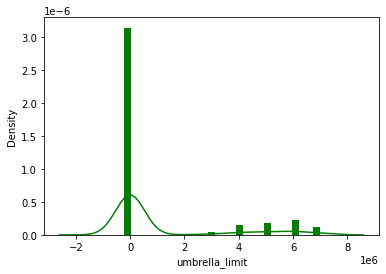

In [67]:
sn.distplot(new_df["umbrella_limit"], hist_kws={'alpha':1}, color='g')

* Here we observe high Positive skewness in data

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

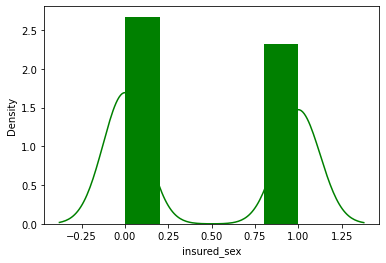

In [68]:
sn.distplot(new_df["insured_sex"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

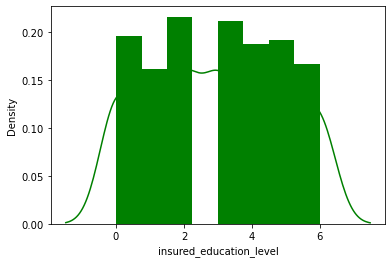

In [69]:
sn.distplot(new_df["insured_education_level"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

In [70]:
sn.distplot(new_df["insured_occupation"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='insured_occupation', ylabel='Density'>

* Here we observe a good negative distribution of data

In [71]:
sn.distplot(new_df["insured_hobbies"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='insured_hobbies', ylabel='Density'>

* Here we observe a good negative distribution of data

In [72]:
sn.distplot(new_df["insured_relationship"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='insured_relationship', ylabel='Density'>

* Here we observe a good distribution of data

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

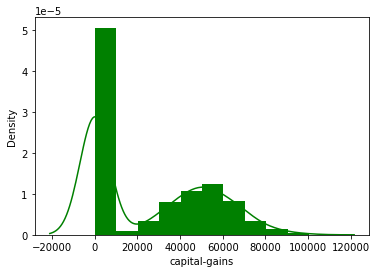

In [73]:
sn.distplot(new_df["capital-gains"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

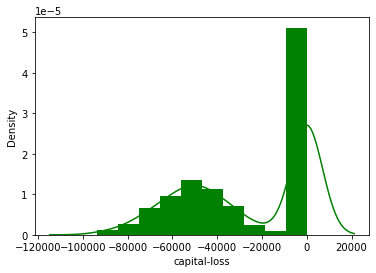

In [74]:
sn.distplot(new_df["capital-loss"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

In [75]:
sn.distplot(new_df["incident_date"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='incident_date', ylabel='Density'>

* Here we observe a good distribution of data

In [76]:
sn.distplot(new_df["incident_type"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='incident_type', ylabel='Density'>

* Here we observe a good distribution of data

<AxesSubplot:xlabel='collision_type', ylabel='Density'>

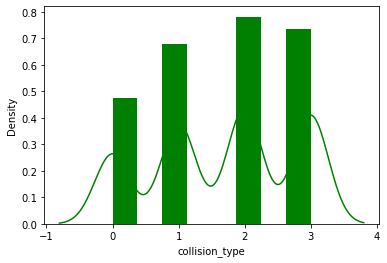

In [77]:
sn.distplot(new_df["collision_type"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

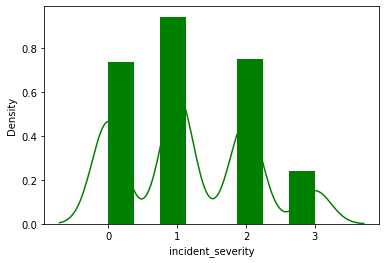

In [78]:
sn.distplot(new_df["incident_severity"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='authorities_contacted', ylabel='Density'>

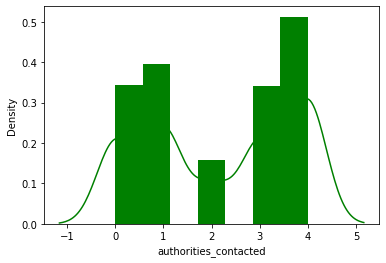

In [79]:
sn.distplot(new_df["authorities_contacted"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='incident_state', ylabel='Density'>

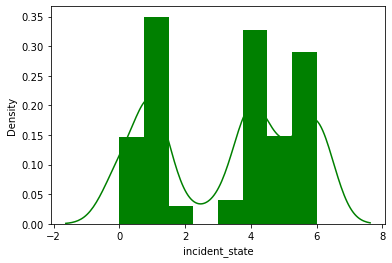

In [80]:
sn.distplot(new_df["incident_state"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='incident_city', ylabel='Density'>

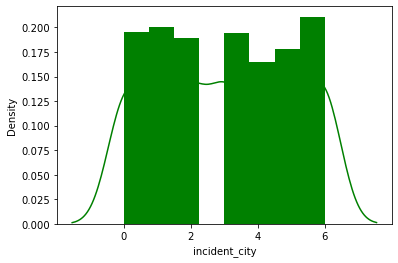

In [81]:
sn.distplot(new_df["incident_city"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='incident_location', ylabel='Density'>

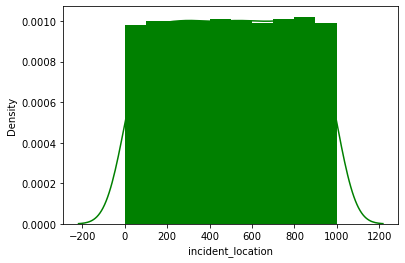

In [82]:
sn.distplot(new_df["incident_location"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

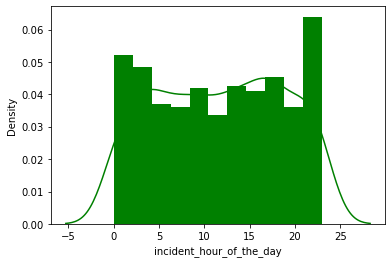

In [83]:
sn.distplot(new_df["incident_hour_of_the_day"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

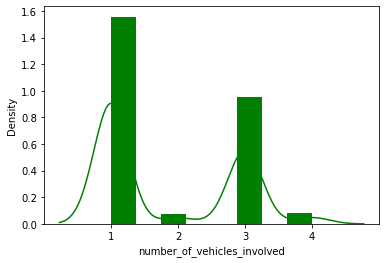

In [84]:
sn.distplot(new_df["number_of_vehicles_involved"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='property_damage', ylabel='Density'>

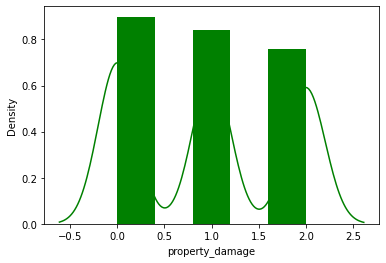

In [85]:
sn.distplot(new_df["property_damage"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

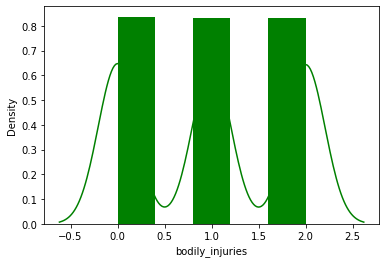

In [86]:
sn.distplot(new_df["bodily_injuries"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

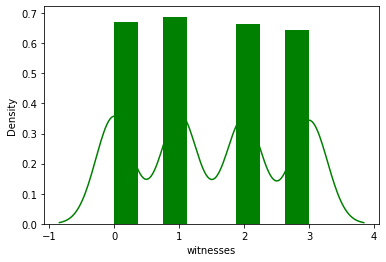

In [87]:
sn.distplot(new_df["witnesses"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='police_report_available', ylabel='Density'>

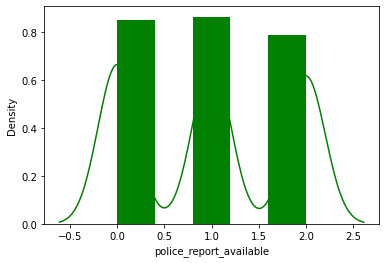

In [88]:
sn.distplot(new_df["police_report_available"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

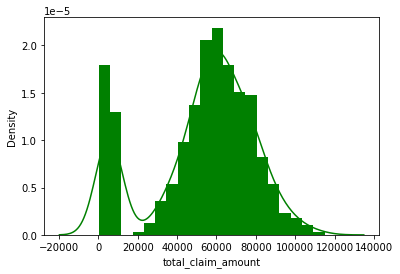

In [89]:
sn.distplot(new_df["total_claim_amount"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

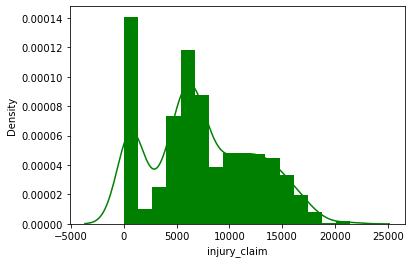

In [90]:
sn.distplot(new_df["injury_claim"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

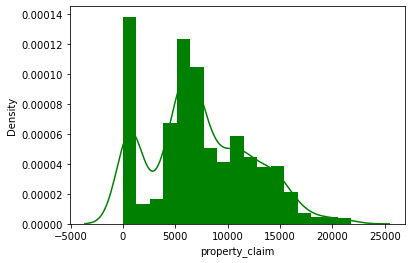

In [91]:
sn.distplot(new_df["property_claim"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

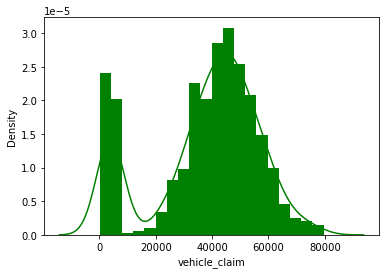

In [92]:
sn.distplot(new_df["vehicle_claim"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='auto_make', ylabel='Density'>

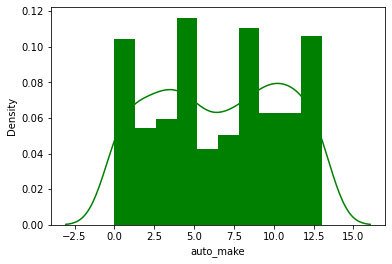

In [93]:
sn.distplot(new_df["auto_make"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='auto_model', ylabel='Density'>

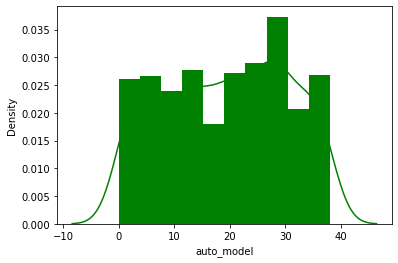

In [94]:
sn.distplot(new_df["auto_model"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

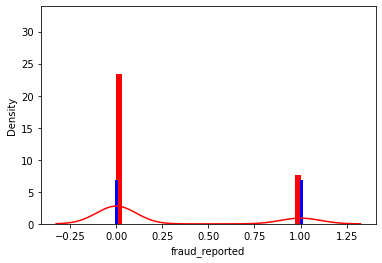

In [95]:
sn.distplot(new_df["fraud_reported"], hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2})

* Here we observe high Positive skewness in data

# Scatterplot

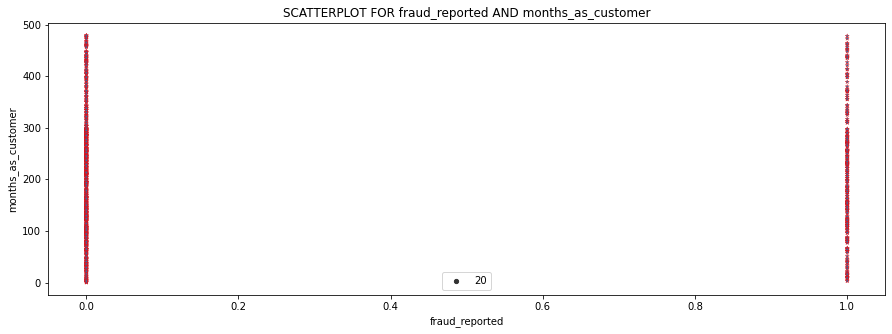

In [96]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND months_as_customer')

sn.scatterplot(new_df['fraud_reported'], new_df['months_as_customer'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for Yes fraud report for all months_as_customer data

In [97]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND age')

sn.scatterplot(new_df['fraud_reported'], new_df['age'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all age data

In [98]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND policy_number')

sn.scatterplot(new_df['fraud_reported'], new_df['policy_number'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all policy_number data

In [99]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND policy_bind_date')

sn.scatterplot(new_df['fraud_reported'], new_df['policy_bind_date'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all policy_bind_date data

In [100]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND policy_state')

sn.scatterplot(new_df['fraud_reported'], new_df['policy_state'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of policy_state data

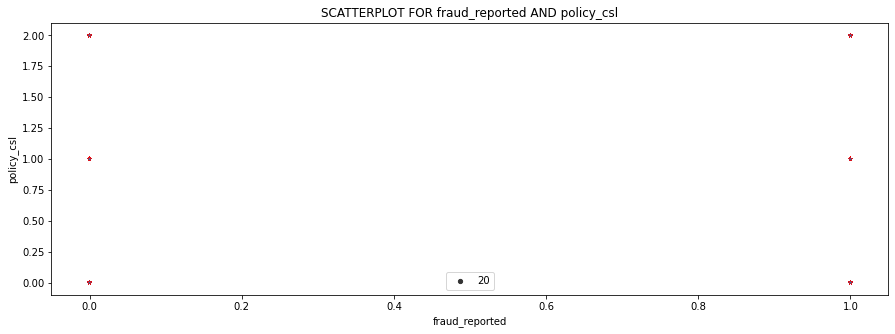

In [101]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND policy_csl')

sn.scatterplot(new_df['fraud_reported'], new_df['policy_csl'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of policy_csl data

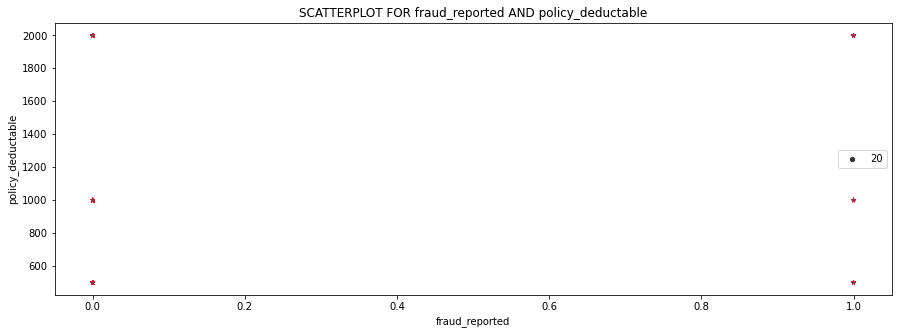

In [102]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND policy_deductable')

sn.scatterplot(new_df['fraud_reported'], new_df['policy_deductable'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of policy_deductable data

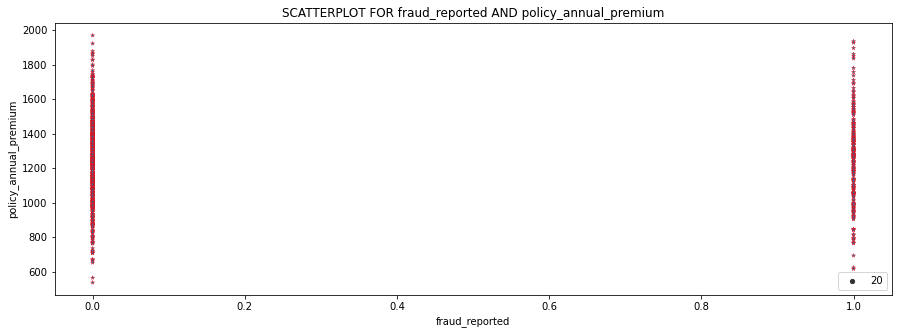

In [103]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND policy_annual_premium')

sn.scatterplot(new_df['fraud_reported'], new_df['policy_annual_premium'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe almost equal amount of scattered data for all fraud report for all types of policy_annual_premium

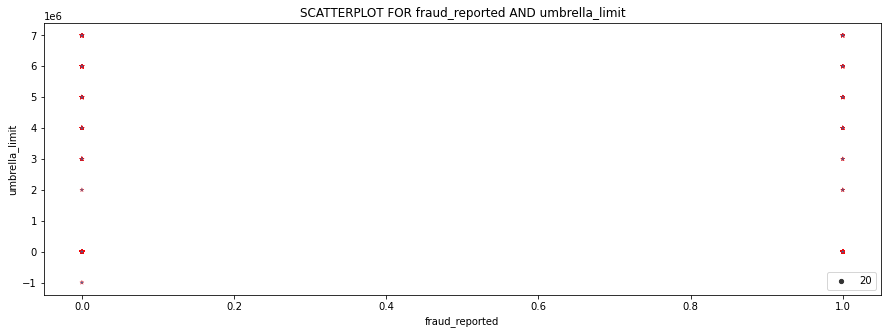

In [104]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND umbrella_limit')

sn.scatterplot(new_df['fraud_reported'], new_df['umbrella_limit'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of umbrella_limit data

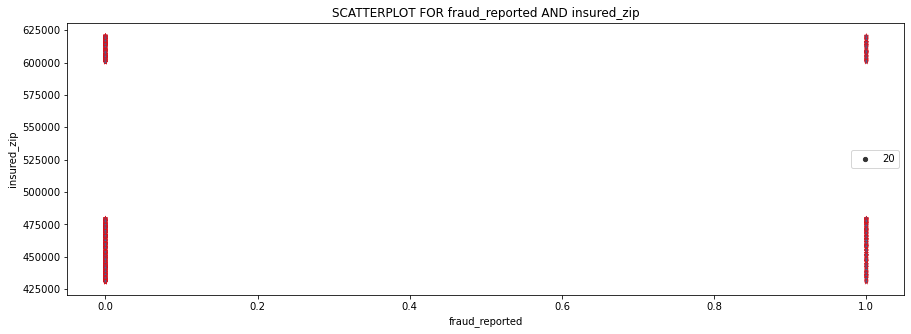

In [105]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND insured_zip')

sn.scatterplot(new_df['fraud_reported'], new_df['insured_zip'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of insured_zip data

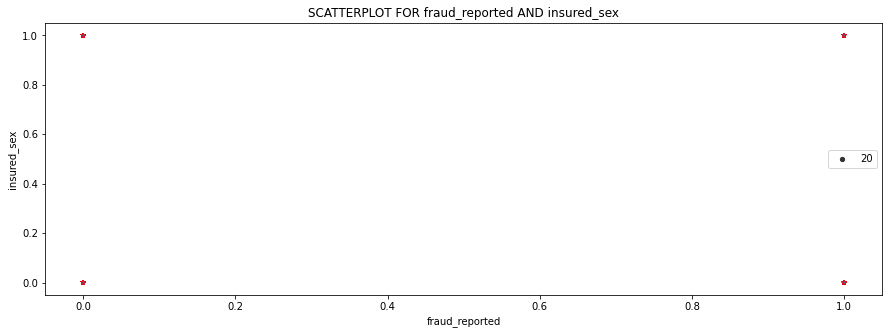

In [106]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND insured_sex')

sn.scatterplot(new_df['fraud_reported'], new_df['insured_sex'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of insured_sex data

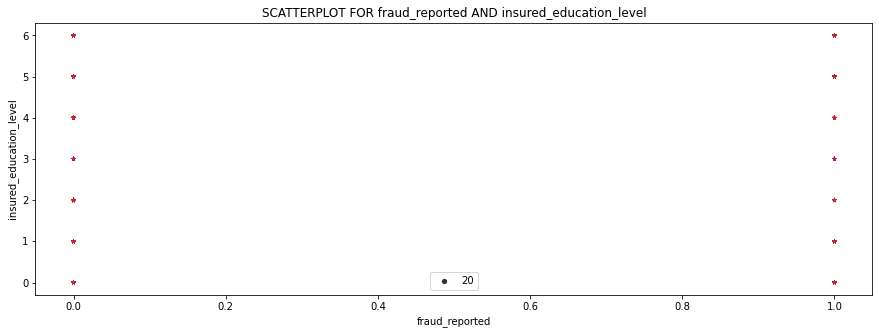

In [107]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND insured_education_level')

sn.scatterplot(new_df['fraud_reported'], new_df['insured_education_level'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of insured_education_level data

In [108]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND insured_occupation')

sn.scatterplot(new_df['fraud_reported'], new_df['insured_occupation'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of insured_occupation data

In [109]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND insured_hobbies')

sn.scatterplot(new_df['fraud_reported'], new_df['insured_hobbies'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of insured_hobbies data

In [110]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND insured_relationship')

sn.scatterplot(new_df['fraud_reported'], new_df['insured_relationship'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of insured_relationship data

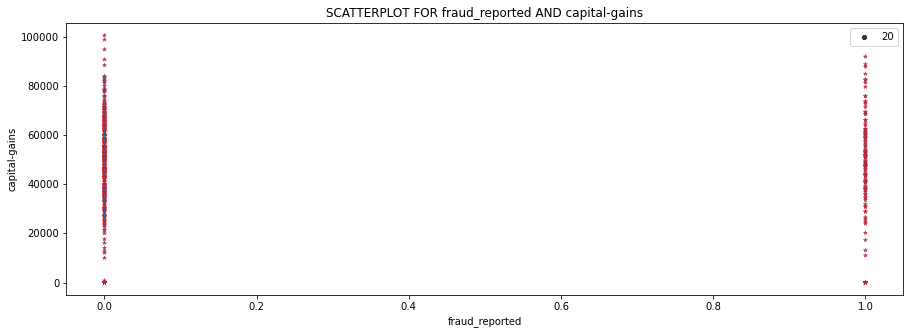

In [111]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND capital-gains')

sn.scatterplot(new_df['fraud_reported'], new_df['capital-gains'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all capital-gains data

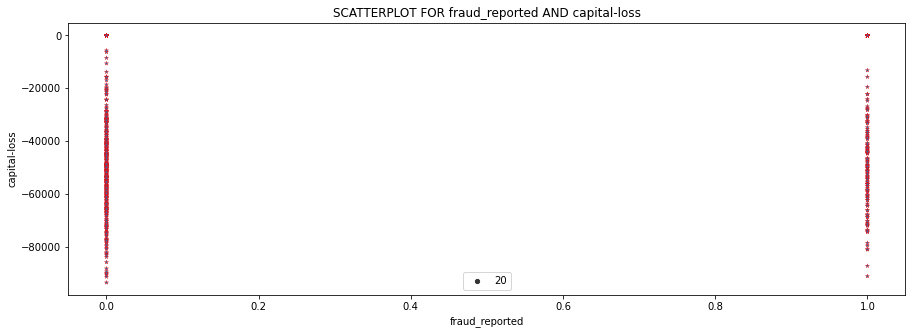

In [112]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND capital-loss')

sn.scatterplot(new_df['fraud_reported'], new_df['capital-loss'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all capital-loss data

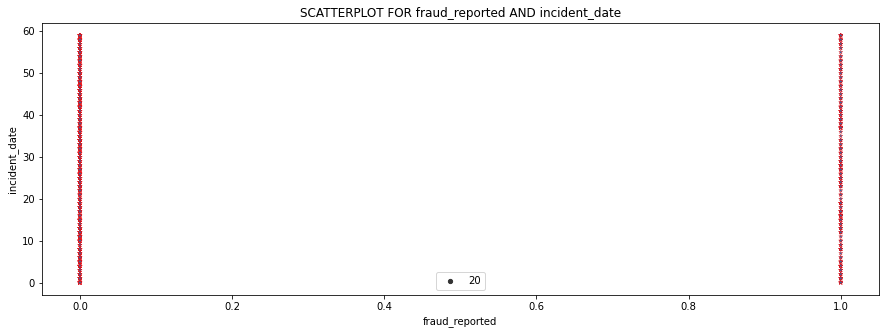

In [113]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_date')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_date'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all incident_date data

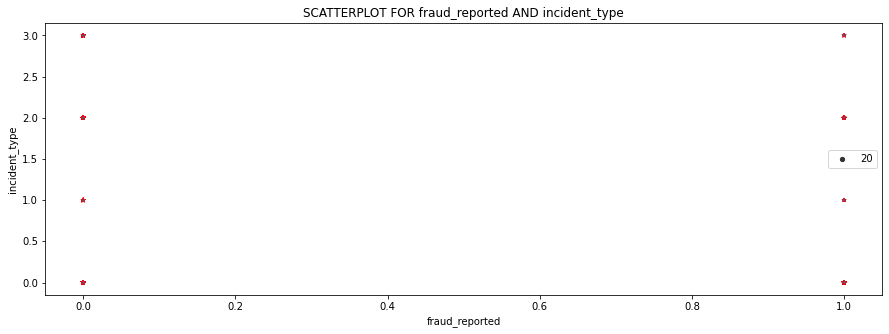

In [114]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_type')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_type'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of incident_type data 

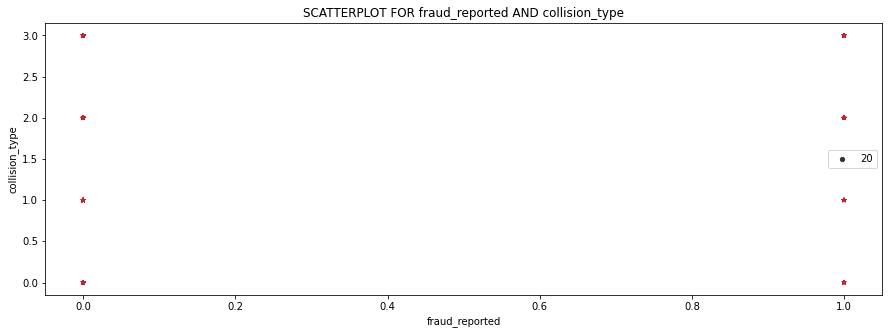

In [115]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND collision_type')

sn.scatterplot(new_df['fraud_reported'], new_df['collision_type'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of collision_type data 

In [116]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_severity')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_severity'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of collision_type data 

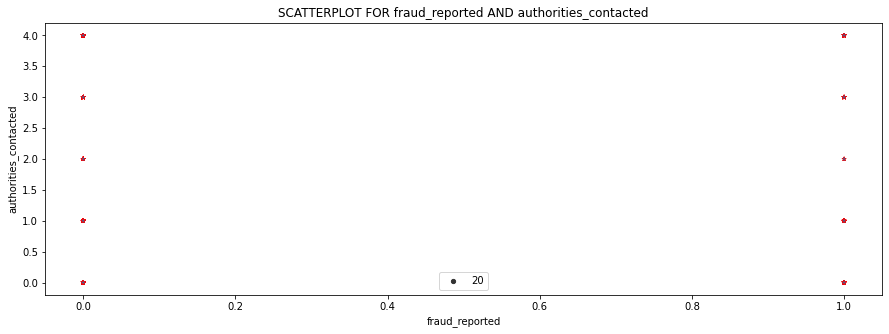

In [117]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND authorities_contacted')

sn.scatterplot(new_df['fraud_reported'], new_df['authorities_contacted'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of authorities_contacted data 

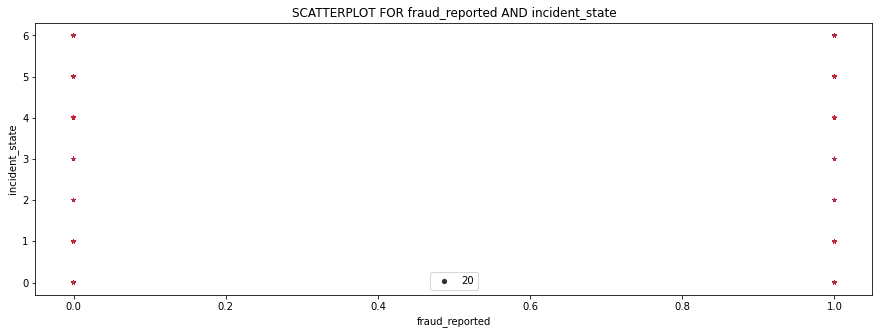

In [118]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_state')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_state'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of incident_state data 

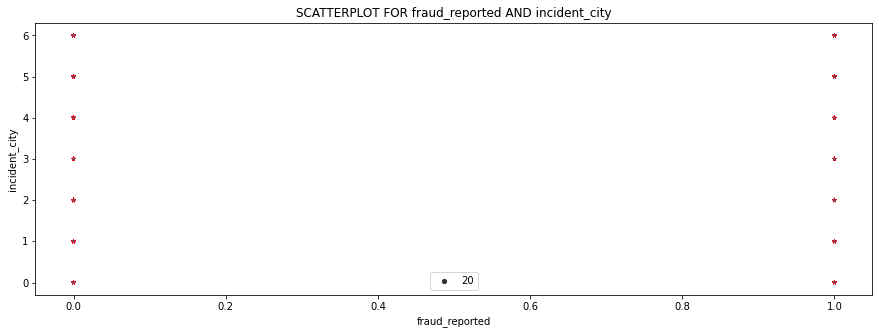

In [119]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_city')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_city'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of incident_city data 

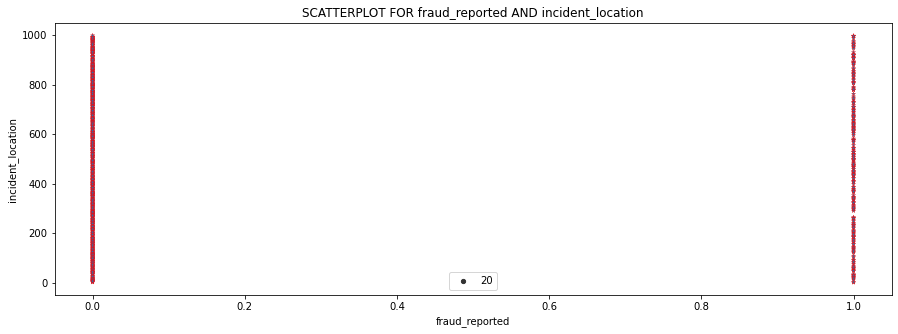

In [120]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_location')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_location'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all incident_location data

In [121]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND incident_hour_of_the_day')

sn.scatterplot(new_df['fraud_reported'], new_df['incident_hour_of_the_day'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of incident_hour_of_the_day data 

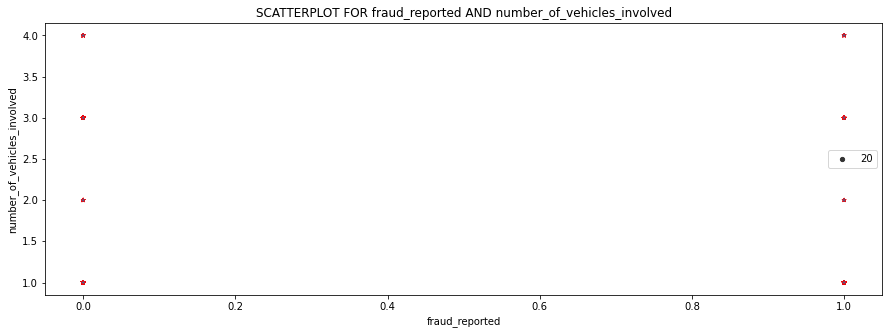

In [122]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND number_of_vehicles_involved')

sn.scatterplot(new_df['fraud_reported'], new_df['number_of_vehicles_involved'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of number_of_vehicles_involved data 

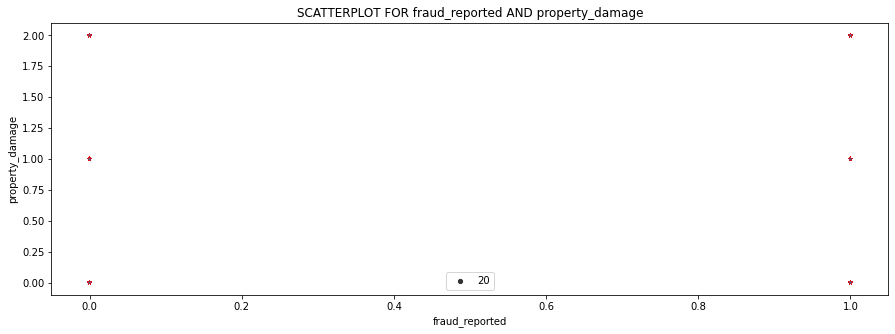

In [123]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND property_damage')

sn.scatterplot(new_df['fraud_reported'], new_df['property_damage'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of property_damage data 

In [124]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND bodily_injuries')

sn.scatterplot(new_df['fraud_reported'], new_df['bodily_injuries'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of bodily_injuries data 

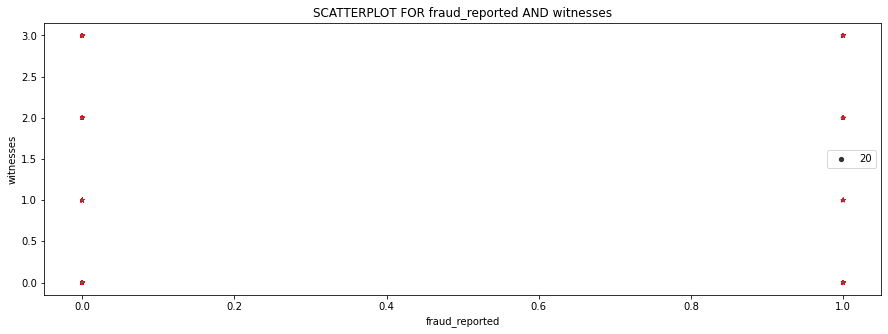

In [125]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND witnesses')

sn.scatterplot(new_df['fraud_reported'], new_df['witnesses'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of witnesses data 

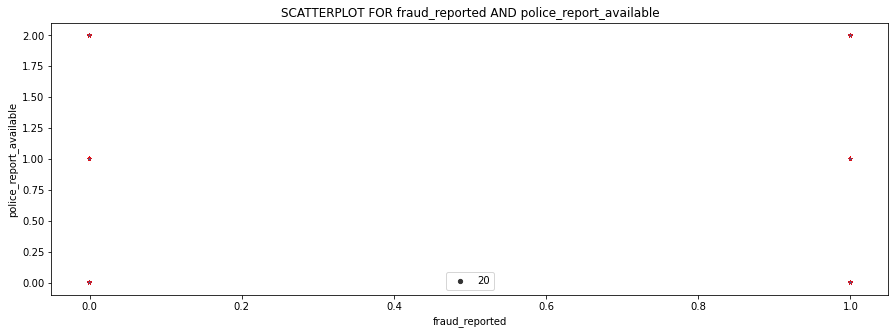

In [126]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND police_report_available')

sn.scatterplot(new_df['fraud_reported'], new_df['police_report_available'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of police_report_available data 

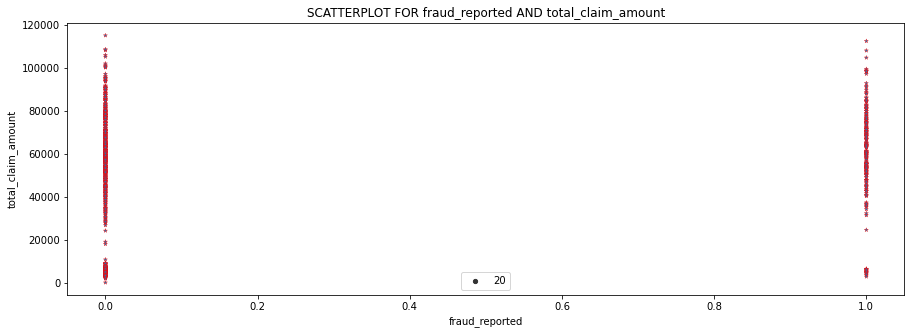

In [127]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND total_claim_amount')

sn.scatterplot(new_df['fraud_reported'], new_df['total_claim_amount'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all total_claim_amount data

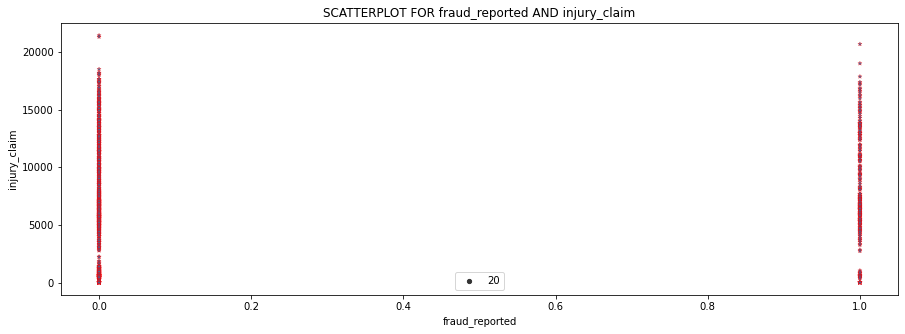

In [128]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND injury_claim')

sn.scatterplot(new_df['fraud_reported'], new_df['injury_claim'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all injury_claim data

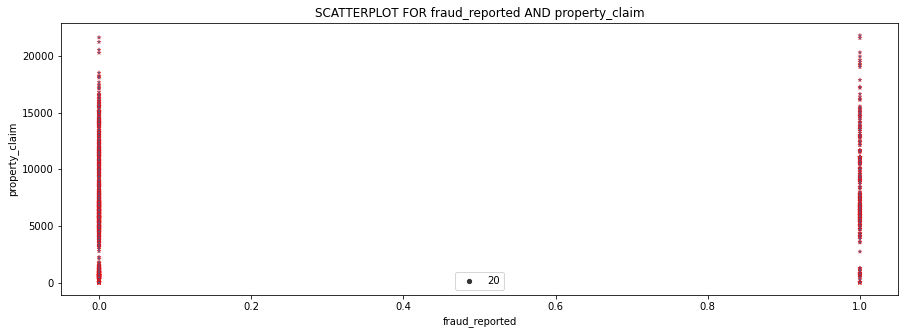

In [129]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND property_claim')

sn.scatterplot(new_df['fraud_reported'], new_df['property_claim'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all property_claim data

In [130]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND vehicle_claim')

sn.scatterplot(new_df['fraud_reported'], new_df['vehicle_claim'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe majority of scattered data for No fraud report for all vehicle_claim data

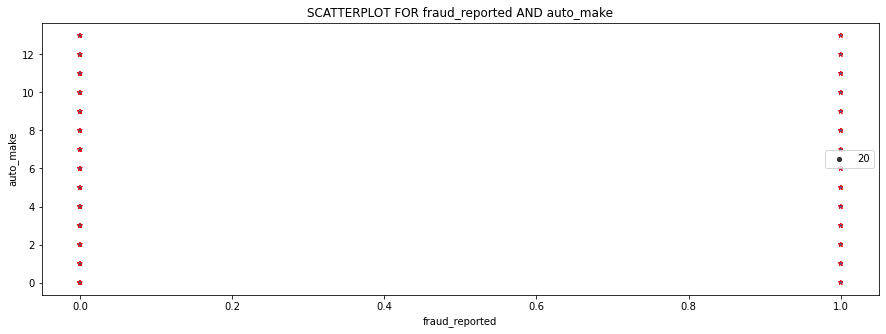

In [131]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND auto_make')

sn.scatterplot(new_df['fraud_reported'], new_df['auto_make'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal amount of scattered data for all fraud report for all types of auto_make data 

In [132]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR fraud_reported AND auto_model')

sn.scatterplot(new_df['fraud_reported'], new_df['auto_model'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe almost equal amount of scattered data for both fraud report for all auto_model data